# NOTEBOOK D'EXPLOITATION DES MODELES ENTRAINES
Dans ce notebook on... exploite des modèles préentrainés.
Un modèle préentrainé est disponible à l'[adresse suivante](https://filesender.renater.fr/?s=download&token=413fa625-51f0-bd9e-67c3-979f9440dbb4).
Il a été généré avec la commande ```python VAE_MNIST.py --cuda```, et entraîné sur un nombre incroyable de 1 EPOCH. C'est tout pourri mais c'est en attendant d'avoir un ```/home/``` sur **laphroaig**.

Amusez vous les cocos on est là pour ça.

In [18]:
import torch
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import transforms

from plotly.offline import plot
import plotly.graph_objs as go

model = torch.load("model_FMNIST_WAE_stoch_100_epoch.torch", map_location="cpu")

In [19]:
testset = MNIST(root='./FMNIST/',
                train=False,
                transform=transforms.ToTensor(),
                download=True)

In [20]:
img = testset[10][0]

In [21]:
def show(img):
    plt.imshow(img.squeeze(0).detach().numpy(), cmap="Greys")
    plt.axis("off")

In [22]:
forward = lambda img: model.decode(model.sample(*model.encode(img)))
#forward = lambda img: model.decode(model.encode(img))

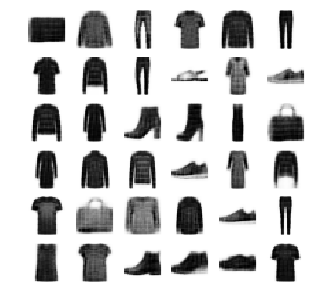

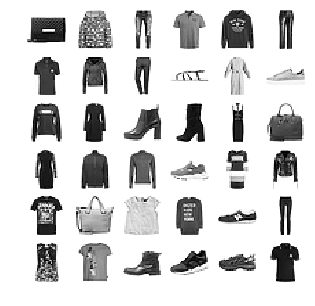

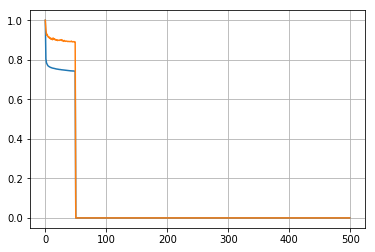

In [23]:
plt.figure(figsize=(5,5))

size = 6

tirage = np.random.randint(0,10000,size**2)

for i in range(size**2):
    plt.subplot(size,size,i+1)
    show(forward(testset[tirage[i]][0]).squeeze(0))

plt.show()

plt.figure(figsize=(5,5))


for i in range(size**2):
    plt.subplot(size,size,i+1)
    show(testset[tirage[i]][0])

plt.show()

log = np.load("log.npy")
train = log.item()["train"]
test = log.item()["test"]
train /= np.max(train)
test /= np.max(test)

plt.plot(train)
plt.plot(test)
plt.grid()
plt.show()

In [17]:
def load_test_set(n):
      y = torch.cat([testset[i][0] for i in range(n)],0)
      z = [testset[i][1] for i in range(n)]
      return y,z

n = 10000

with torch.no_grad():
    x,label   = load_test_set(n)
    logvar,mu = model.encode(x)
    z         = model.sample(logvar,mu).numpy()
    #z = model.encode(x).numpy()

Rxx = np.cov(z.T)
[U,S,V] = np.linalg.svd(Rxx,full_matrices=True)
W = U[:,:3]

latent = z.dot(W)

sort = np.argsort(label)
label = np.asarray(label)[sort]
latent = latent[sort,:]
data = []

for i in range(10):
    data.append(go.Scatter3d(x=latent[label==i,0],
                     y =latent[label==i,1],
                     z =latent[label==i,2],
                     mode = 'markers',
                     marker = dict(size=2,
                                  color=i,
                                  colorscale="Jet",
                                  opacity=.8)))

fig = go.Figure(data=data)
plot(fig)

'file:///home/antoine/dev/serge/temp-plot.html'